<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Anomaly Detection

## Table of Content

1. [Introduction to Anomaly Detection](#section1)<br>
    - 1.1 [What are anomalies?](#section101)<br>
    - 1.2 [Anomaly Detection Technique](#section102)<br>
        - 1.2.1 [Simple Statistical Methods](#section103)<br>
        - 1.2.2 [Machine Learning Based Approach](#section104)<br>
2. [Use Case : Credit Fraud](#section2)<br>
3. [Data Preprocessing](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Model Prediction](#section5)<br>
6. [Conclusion](#section6)<br>

<a id=section101></a>
## Introduction

Anomaly detection is a technique used to __identify unusual patterns__ that do not conform to expected behavior, called __outliers__. 
- It has many applications in business, from 
    - __Intrusion detection__ (identifying strange patterns in network traffic that could signal a hack).
    - system __health monitoring__ (spotting a malignant tumor in an MRI scan).
    - __Fraud detection__ in credit card transactions.
    - __Fault detection__ in operating environments.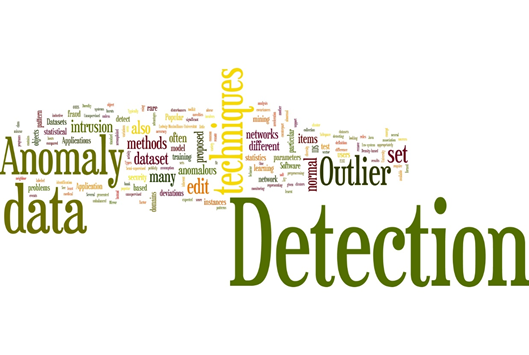

<a id=section101></a>
### What are anomalies?

Anomalies can be broadly categorized as:<br>
1. Point anomalies
2. Contextual anmoalies
3. Collective anomalies

#### 1. Point Anamoly  
A single instance of data is anomalous if it's too far off from the rest. <br><br>__Business use case__: Detecting credit card fraud based on "amount spent."<br>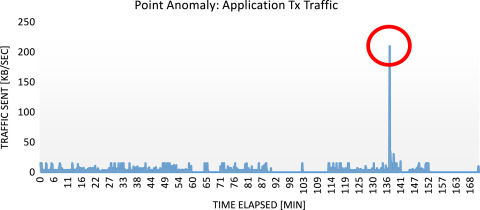

2. The abnormality is context specific. This type of anomaly is common in time-series data.<br> 
Business use case: Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.<br>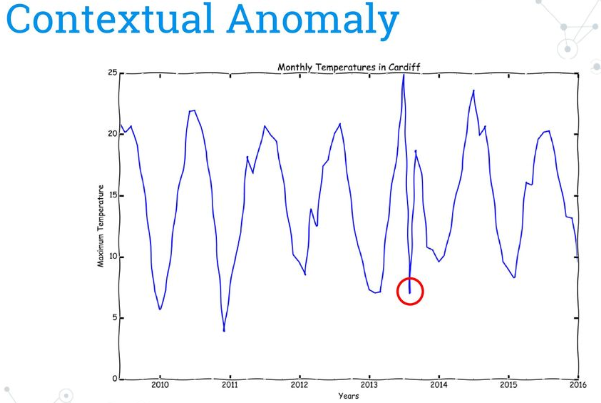

3. A set of data instances collectively helps in detecting anomalies.<br> 
Business use case: Someone is trying to copy data from a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack. <br>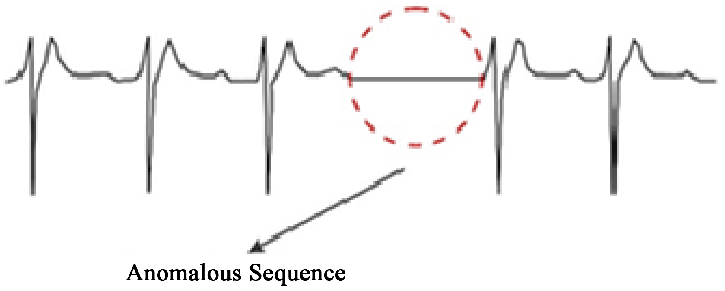

Anomaly detection is similar to — but not entirely the same as — __noise removal__ and __novelty detection__. <br><br>
`Novelty detection is concerned with identifying an unobserved pattern in new observations not included in training data — like a sudden interest in a new channel on YouTube during Christmas, for instance.`<br><br> 
`Noise removal (NR) is the process of immunizing analysis from the occurrence of unwanted observations; in other words, removing noise from an otherwise meaningful signal.`

<a id=section102></a>
## Anomaly Detection Techniques

### Simple statistical methods

The simplest approach to identifying irregularities in data is to flag the data points that deviate from common statistical properties of a distribution, including mean, median, mode, and quantiles.<br>
- Let's say the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean.
- Traversing mean over time-series data isn't exactly trivial, as it's not static. 
- You would need a rolling window to compute the average across the data points. 
- Technically, this is called a rolling average or a moving average, and it's intended to smooth short-term fluctuations and highlight long-term ones. 
- Mathematically, an n-period simple moving average can also be defined as a "low pass filter."

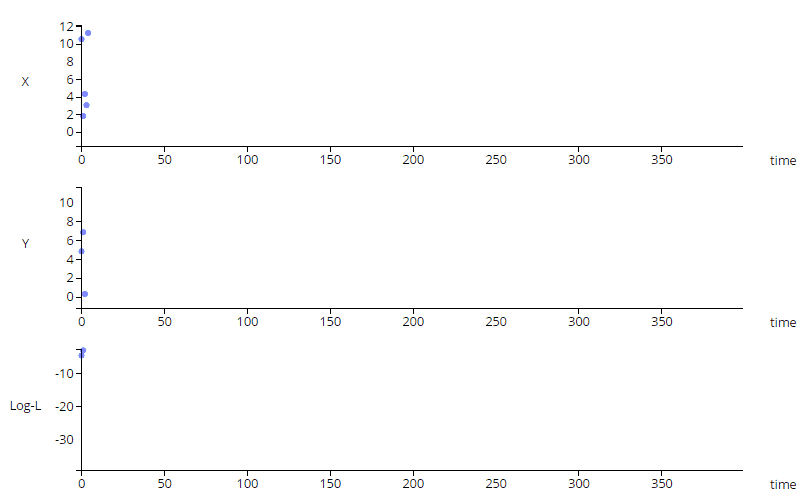

### Machine Learning Based Approach

#### Density based Anomaly Detection

Density-based anomaly detection is based on the __k-nearest neighbors__ algorithm.

__Assumption__: Normal data points occur around a __dense neighborhood and abnormalities are far away__. 

The nearest set of data points are evaluated using a score, which could be Eucledian distance or a similar measure dependent on the type of the data (categorical or numerical). They could be broadly classified into two algorithms:<br>

1. __K-nearest neighbor__: k-NN is a simple, non-parametric lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian, Manhattan, Minkowski, or Hamming distance.
2. __Relative density of data__: This is better known as __local outlier factor (LOF)__. This concept is based on a distance metric called reachability distance.<br>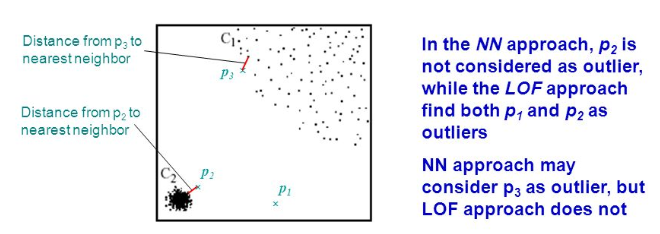

#### Clustering Based Anomaly Detection
__Clustering__ is one of the most popular concepts in the domain of __unsupervised learning__.

__Assumption__: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

__K-means__ is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that __fall outside__ of these groups could potentially be marked as anomalies.<br>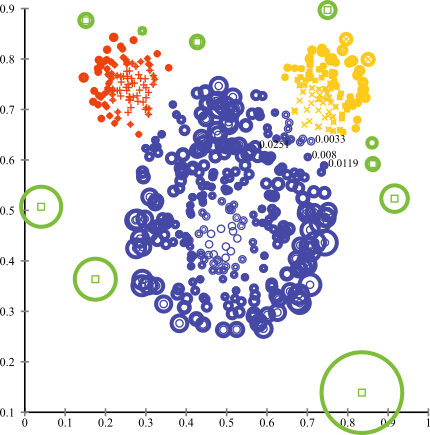

#### Support Vector Machine Based Anomaly Detection
A support vector machine is another effective technique for detecting anomalies. 
- A SVM is typically associated with __supervised learning__, but there are _extensions (OneClassCVM, for instance) that can be used to identify anomalies as an unsupervised problems (in which training data are not labeled)_. 
- The algorithm learns a soft boundary in order to cluster the normal data instances using the training set, and then, using the testing instance, it tunes itself to identify the abnormalities that fall outside the learned region.<br>

Depending on the use case, the output of an anomaly detector could be __numeric scalar values for filtering on domain-specific thresholds or textual labels (such as binary/multi labels)__.<br>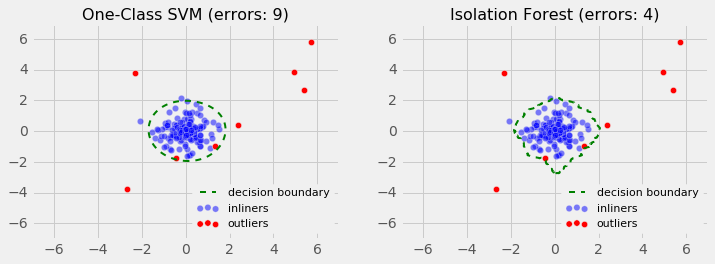

In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/mrshu/Downloads/data/train.csv')
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [2]:
df = data.loc[data['prop_id'] == 104517]
df = df.loc[df['srch_room_count'] == 1]
df = df.loc[df['visitor_location_country_id'] == 219]
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 2041 to 9917395
Data columns (total 4 columns):
date_time                   3049 non-null object
price_usd                   3049 non-null float64
srch_booking_window         3049 non-null int64
srch_saturday_night_bool    3049 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 119.1+ KB


In [5]:
df['price_usd'].describe()

count    3049.000000
mean      112.939023
std       113.374049
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max      5584.000000
Name: price_usd, dtype: float64

At this point, we have detected one extreme anomaly which was the Max price_usd at 5584.

If an individual data instance can be considered as anomalous with respect to the rest of the data, we call it Point Anomalies (e.g. purchase with large transaction value). We could go back to check the log to see what was it about. After a little bit investigation, I guess it was either a mistake or user searched a presidential suite by accident and had no intention to book or view. In order to find more anomalies that are not extreme, I decided to remove this one.

In [7]:
data.loc[(data['price_usd'] == 5584) & (data['visitor_location_country_id'] == 219)]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2905344,195154,2013-04-07 20:59:07,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,28.0,0,NaN,0


In [8]:
df = df.loc[df['price_usd'] < 5584]

At this point, I am sure you have found that we are missing something, that is, we do not know what room type a user searched for, the price for a standard room could be very different with the price for a King bed room with Ocean View. Keep this in mind, for the demonstration purpose, we have to continue.

## Time series visualization

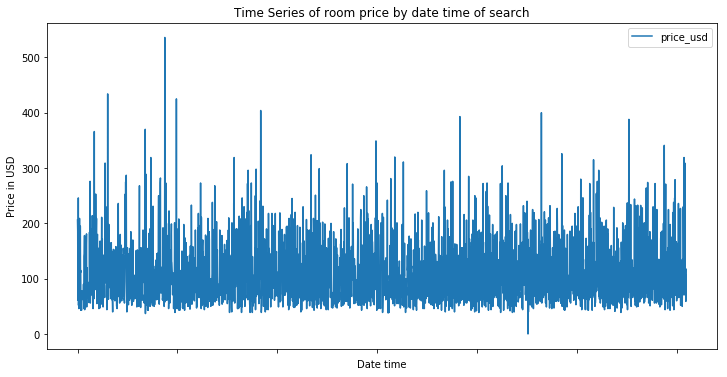

In [11]:
import matplotlib.pyplot as plt
df.plot(x='date_time', y='price_usd', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search');

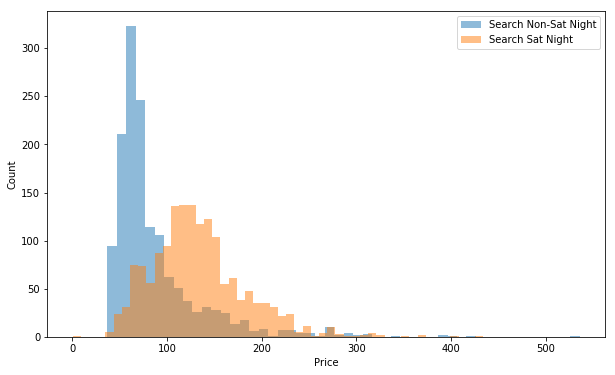

In [12]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(b, bins = 50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show();

In general, the price is more stable and lower when searching Non-Saturday night. And the price goes up when searching Saturday night. Seems this property gets popular during the weekend.

## Clustering based Anomaly Detection
### k-means algorithm

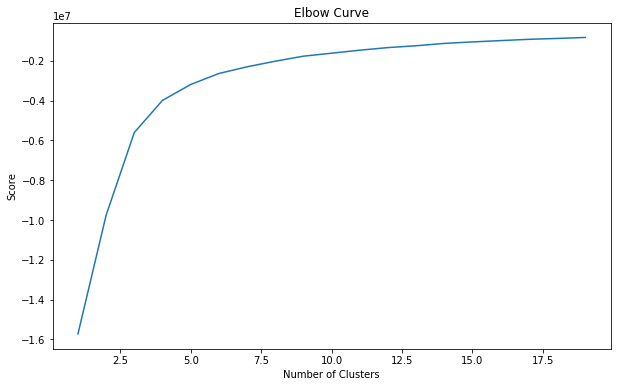

In [13]:
from sklearn.cluster import KMeans
dat = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(dat) for i in n_cluster]
scores = [kmeans[i].score(dat) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

From the above elbow curve, we see that the graph levels off after 10 clusters, implying that addition of more clusters do not explain much more of the variance in our relevant variable; in this case price_usd.

we set n_clusters=10, and upon generating the k-means output use the data to plot the 3D clusters.

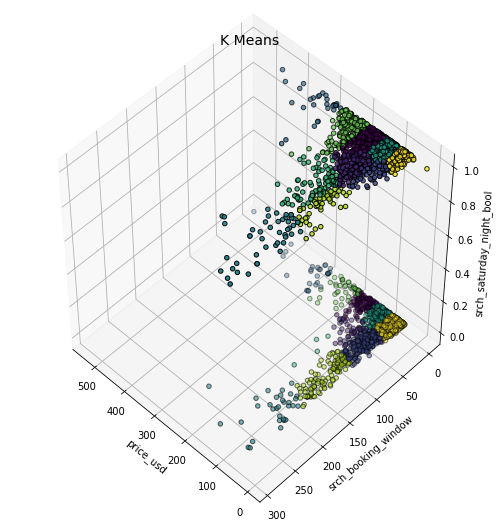

In [16]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14);

Now we need to find out the number of components (features) to keep.



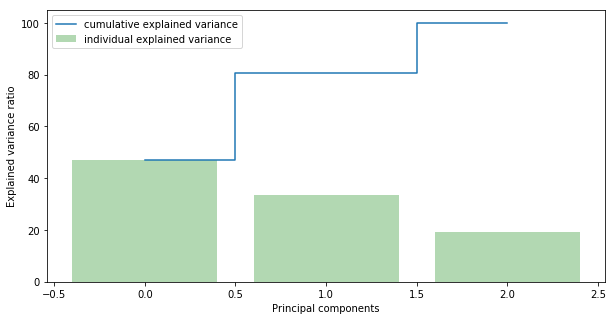

In [23]:
from sklearn.preprocessing import StandardScaler
dt = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = dt.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

We see that the first component explains almost 50% of the variance. The second component explains over 30%. However, we’ve got to notice that almost none of the components are really negligible. The first 2 components contain over 80% of the information. So, we will set n_components=2.

The underline assumption in the clustering based anomaly detection is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters. We use the following steps to find and visualize anomalies.

- Calculate the distance between each point and its nearest centroid. The biggest distances are considered as anomaly.
- We use outliers_fraction to provide information to the algorithm about the proportion of the outliers present in our data set. Situations may vary from data set to data set. However, as a starting figure, I estimate outliers_fraction=0.01, since it is the percentage of observations that should fall over the absolute value 3 in the Z score distance from the mean in a standardized normal distribution.
- Calculate number_of_outliers using outliers_fraction.
- Set threshold as the minimum distance of these outliers.
- The anomaly result of anomaly1 contains the above method Cluster (0:normal, 1:anomaly).
- Visualize anomalies with cluster view.
- Visualize anomalies with Time Series view.

In [24]:
def getDistanceByPoint(dt, model):
    distance = pd.Series()
    for i in range(0,len(dt)):
        Xa = np.array(dt.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(dat, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

KeyError: 'the label [0] is not in the [index]'

In [25]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly1'] == 1, ['date_time_int', 'price_usd']] #anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue', label='Normal')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label='Anomaly')
plt.xlabel('Date Time Integer')
plt.ylabel('price in USD')
plt.legend()
plt.show();

ValueError: invalid literal for int() with base 10: '2012-11-01 02:48:30'